# Practical Lab 7 - Performance Metrics for Classification

## Introduction

My Python notebook is like a digital workbook. It’s set up to sort numbers using a big collection of handwritten digits called the MNIST dataset. We use a method called Stochastic Gradient Descent (SGD) and Random FOREST to do this. Think of SGD as a smart guess-and-check method. The MNIST dataset is a popular tool for teaching computers to recognize images.

The code is divided into several parts as per structure notebook:

Data Exploration: We first load the MNIST dataset and look at the first 25 images to understand what we’re working with.

Data Preprocessing: We split the MNIST dataset into a training set and a testing set. This allows us to test our model’s performance on data it hasn’t seen before.

Modeling: We create a SGD and Random Forest classifier and train it using our training data. This helps our model learn the relationship between the digit images and their labels.

Evaluation: We test our model’s performance by making predictions on the training set and comparing these to the actual labels. We use several measures for this, including the confusion matrix, precision, recall, F1 score, and ROC AUC score. We also plot the precision-recall curve and the ROC curve to visualize our model’s performance.

In [99]:
# Importing libraries
import numpy as np  # NumPy is used for numerical operations
import pandas as pd  # Pandas is used for data manipulation and analysis
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, animated, and 
                                    # interactive visualizations in Python
import seaborn as sns  # Seaborn is a Python data visualization library based on matplotlib
from sklearn.datasets import fetch_openml  # fetch_openml is used to fetch dataset from openml 
                                            # by name or dataset id
from sklearn.linear_model import SGDClassifier  # SGDClassifier is a Linear classifiers 
                                                #(SVM, logistic regression, etc.) with SGD training
# train_test_split is used to split the data into random train and test subsets, 
# cross_val_predict generates cross-validated estimates for each input data point, 
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score  
# These are various metrics used to measure the quality of prediction of the classifier
from sklearn.metrics import precision_recall_curve # Compute precision-recall pairs for 
                                                    # different probability thresholds
from sklearn.ensemble import RandomForestClassifier  # RandomForestClassifier is a meta estimator
from sklearn.preprocessing import label_binarize # label_binarize is used to binarize labels in a 
                                                # one-vs-all fashion
from sklearn.impute import SimpleImputer # SimpleImputer is used to replace missing values

## Data Exploration
We first import the necessary libraries and load the MNIST dataset. We then visualize the first 25 images from the dataset to understand what we're working with.

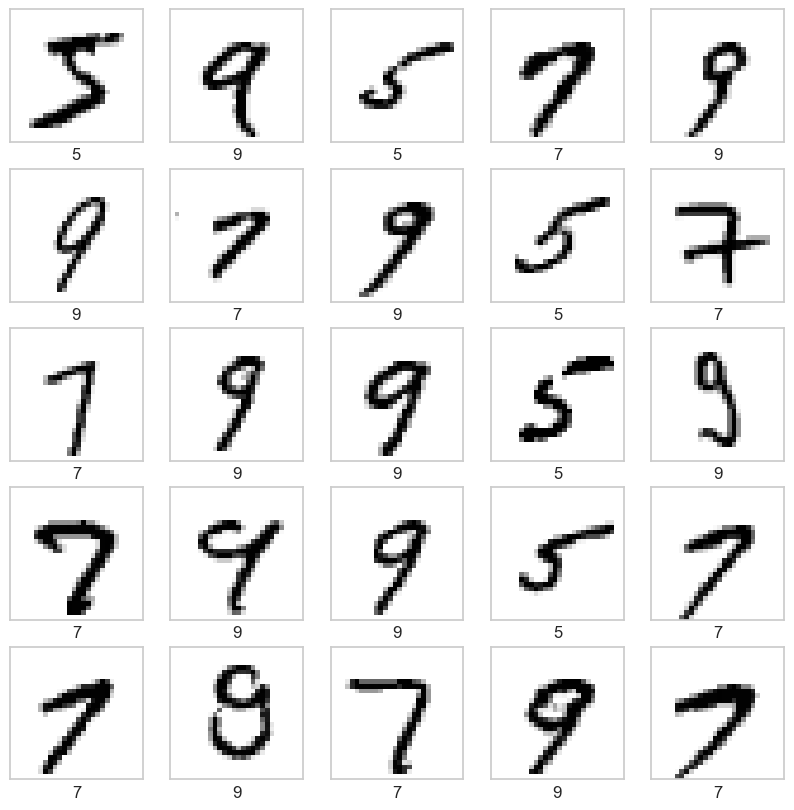

Shape of the data:  (20564, 784)


In [100]:
mnist_dataset = fetch_openml('mnist_784', as_frame=False, parser='auto') 
# Filtering the data to include only classes 5, 7, and 9
mask = np.isin(mnist_dataset.target, ['5', '7', '9'])
mnist_dataset.data = mnist_dataset.data[mask]
mnist_dataset.target = mnist_dataset.target[mask] # Fetch the MNIST dataset

plt.figure(figsize=(10,10))  # Created a new figure with a specific size (10 x 10)
for i in range(25):  # Looping over 25 iterations
    plt.subplot(5,5,i+1)  # Added a subplot to the current figure
    plt.xticks([])  # Removed x-axis tick marks
    plt.yticks([])  # Removed y-axis tick marks
    plt.grid(False)  # Removed grid
    plt.imshow(mnist_dataset.data[i].reshape(28,28), cmap=plt.cm.binary)  # Displaying an image, 
    # therefore, data on a 2D regular raster
    plt.xlabel(mnist_dataset.target[i])  # Set the label for the x-axis
plt.show()  # Display the figure

print("Shape of the data: ", mnist_dataset.data.shape)  # Print the shape of the data

## Data Preprocessing
We split the MNIST dataset into a training set and a testing set. This allows us to test our model’s performance on data it hasn’t seen before.

In [101]:
# Spliting the data into train and temporary sets
training_data, temp_data, training_labels, temp_labels = train_test_split(mnist_dataset.data, mnist_dataset.target, test_size=0.4, random_state=77)

# Spliting the temporary set into validation and test sets
validation_data, testing_data, validation_labels, testing_labels = train_test_split(temp_data, temp_labels, test_size=0.5, random_state=77)

## Modeling
We create a SGD and Forest classifier and train it using our training data. This helps our model learn the relationship between the digit images and their labels.

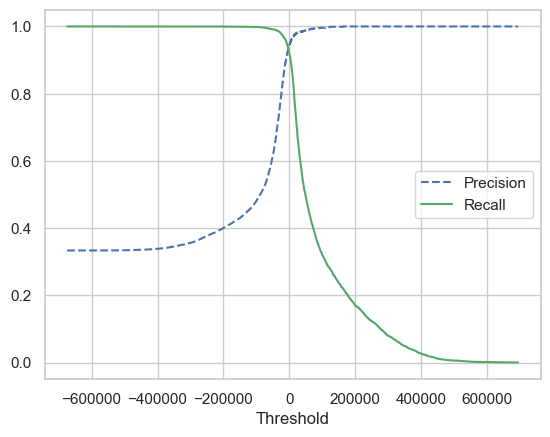

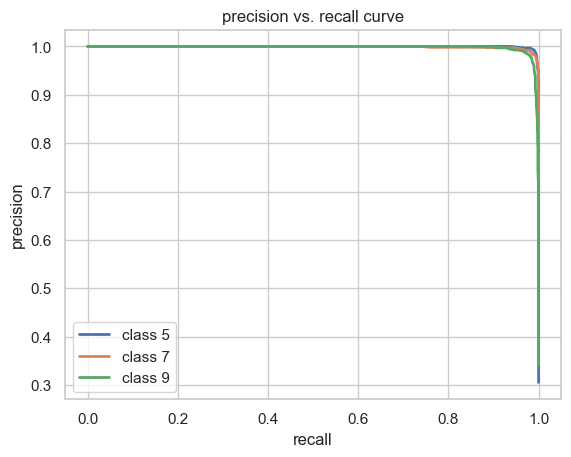

In [102]:
# Handling missing values
imputer = SimpleImputer(strategy='mean')  # or 'median'
training_data = imputer.fit_transform(training_data)
validation_data = imputer.transform(validation_data)

# Training the SGDClassifier
sgd_classifier = SGDClassifier(loss='hinge', random_state=77)  # Changed 'log' to 'hinge'
sgd_classifier.fit(training_data, training_labels)

# Geting the decision function scores of each instance in the validation set
scores = sgd_classifier.decision_function(validation_data)  # Changed 'predict_proba' to 'decision_function'

# Binarized the labels
binarized_labels = label_binarize(validation_labels, classes=['5', '7', '9'])

# Computed precision and recall for all possible thresholds
precisions, recalls, thresholds = precision_recall_curve(binarized_labels.ravel(), scores.ravel())

# Finding the threshold that gives the highest precision
threshold_optimum = thresholds[np.argmax(precisions)]
# Made predictions based on the optimized threshold
predictions_optimized_precision = (scores > threshold_optimum)

# Ploting precision and recall as functions of the threshold value
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.legend(loc="center right")
plt.xlabel("Threshold")
plt.show()

# Trained the RandomForestClassifier
clf = RandomForestClassifier(random_state=77)
clf.fit(training_data, training_labels)

# Binarized the validation labels
binarized_validation_labels = label_binarize(validation_labels, classes=clf.classes_)

# Geting the probabilities of each instance in the validation set
probas = clf.predict_proba(validation_data)

# Computed and plot precision-recall curve for each class
for i in range(len(clf.classes_)):
    precisions, recalls, _ = precision_recall_curve(binarized_validation_labels[:, i], probas[:, i])
    plt.plot(recalls, precisions, lw=2, label='class {}'.format(clf.classes_[i]))

# Finding the threshold that gives the highest recall
threshold_optimum = thresholds[np.argmax(recalls)]
# Make predictions based on the optimized threshold
predictions_optimized_recall = (scores > threshold_optimum)

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()


## Evaluation
We test our model’s performance by making predictions on the training set and comparing these to the actual labels. We use several measures for this, including the confusion matrix, precision, recall, F1 score, and ROC AUC score. We also plot the precision-recall curve and the ROC curve to visualize our model’s performance.

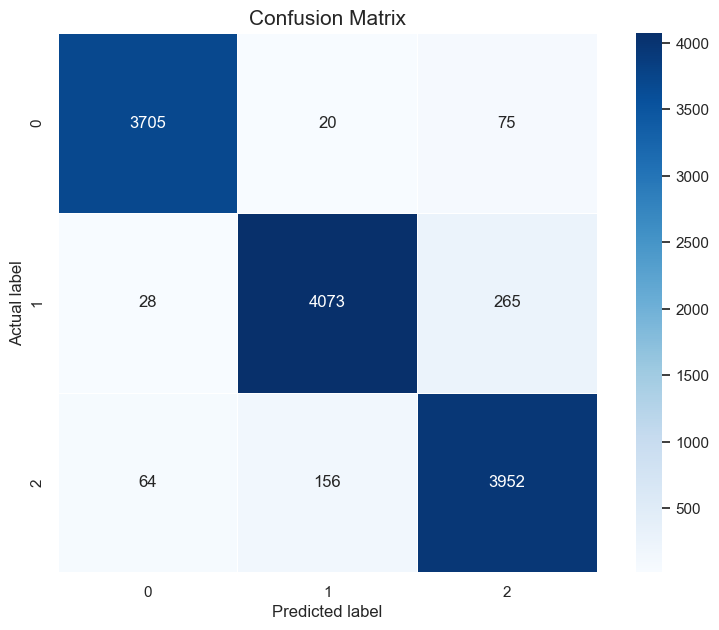

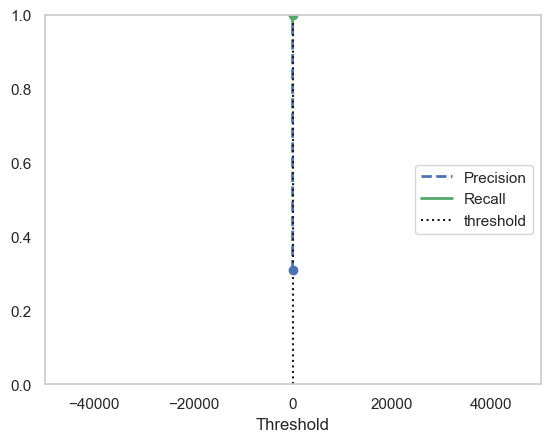

Precision:  0.9510931311425294
Recall:  0.9507213486788783
F1 Score:  0.9507819821574163


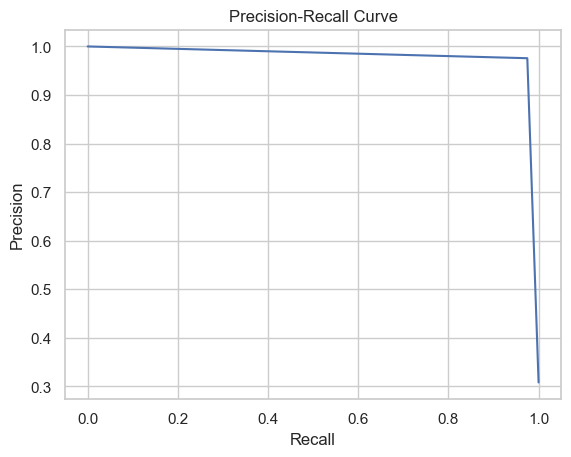

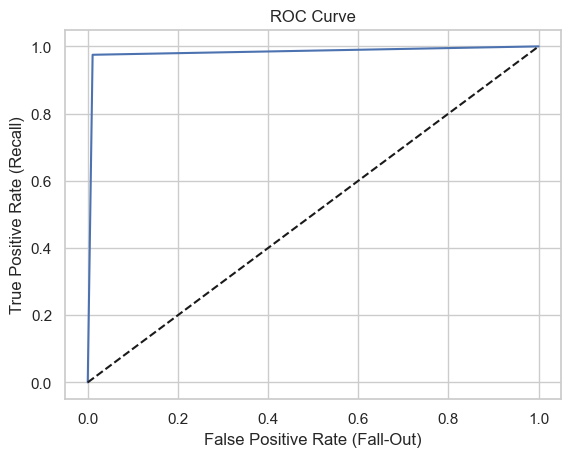

ROC AUC Score:  0.9821123213867416


In [103]:
# Generating cross-validated predictions for each data point in the training set
cross_validated_predictions = cross_val_predict(sgd_classifier, training_data, training_labels, cv=3)

# Computed the confusion matrix to evaluate the accuracy of the classification
confusion_matrix_values = confusion_matrix(training_labels, cross_validated_predictions)

# Created a new figure with a specific size
plt.figure(figsize=(10,7))

# Ploting the confusion matrix as a color-encoded matrix using seaborn's heatmap function
sns.heatmap(confusion_matrix_values, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues')

# Seting the labels for the y-axis and x-axis
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Seting a title for the axes
plt.title('Confusion Matrix', size = 15)

# Displaying the figure
plt.show()

# Computed precision-recall pairs for different probability thresholds
precision_values, recall_values, thresholds = precision_recall_curve(training_labels == '5', cross_validated_predictions == '5')

# Ploting precision and recall for different thresholds
plt.plot(thresholds, precision_values[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recall_values[:-1], "g-", label="Recall", linewidth=2)

# Added a vertical line for the selected threshold
threshold = 0  # replace with your chosen threshold
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

# Highlighting the precision and recall values at the selected threshold
idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precision_values[idx], "bo")
plt.plot(thresholds[idx], recall_values[idx], "go")

# Seting the range of the x-axis and y-axis
plt.axis([-50000, 50000, 0, 1])

# Adding a grid, a label for the x-axis, and a legend
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

# Displaying the figure
plt.show()

# Computed the precision, recall, and F1 score
precision_value = precision_score(training_labels, cross_validated_predictions, average='weighted')
recall_value = recall_score(training_labels, cross_validated_predictions, average='weighted')
f1_score_value = f1_score(training_labels, cross_validated_predictions, average='weighted')

# Printing the precision, recall, and F1 score
print("Precision: ", precision_value)
print("Recall: ", recall_value)
print("F1 Score: ", f1_score_value)

# Computed precision-recall pairs for different probability thresholds
precision_values, recall_values, _ = precision_recall_curve(training_labels == '5', cross_validated_predictions == '5')

# Ploting recall values versus precision values
plt.plot(recall_values, precision_values)

# Seting the labels for the y-axis and x-axis
plt.xlabel('Recall')
plt.ylabel('Precision')

# Seting a title for the axes
plt.title('Precision-Recall Curve')

# Displaying the figure
plt.show()

# Computed Receiver operating characteristic (ROC)
false_positive_rate_values, true_positive_rate_values, thresholds = roc_curve(training_labels == '5', cross_validated_predictions == '5')

# Ploting true positive rate values versus false positive rate values
plt.plot(false_positive_rate_values, true_positive_rate_values)

# Ploting a line from (0,0) to (1,1)
plt.plot([0, 1], [0, 1], 'k--')

# Seting the labels for the y-axis and x-axis
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')

# Seting a title for the axes
plt.title('ROC Curve')

# Displaying the figure
plt.show()

# Computed Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores
roc_auc_score_value = roc_auc_score(training_labels == '5', cross_validated_predictions == '5')

# Printing the ROC AUC Score
print("ROC AUC Score: ", roc_auc_score_value)

# Handled missing values in the test set
testing_data = imputer.transform(testing_data)
# Made predictions on the test set
test_predictions = sgd_classifier.predict(testing_data)

## Conclusion

In [104]:
# Printing the precision, recall, and F1 score
print("Precision: ", precision_value)
print("Recall: ", recall_value)
print("F1 Score: ", f1_score_value)
print('')

# Computed and print the precision, recall, and F1 score for the test set
print("Test Precision: ", precision_score(testing_labels, test_predictions, average='weighted'))
print("Test Recall: ", recall_score(testing_labels, test_predictions, average='weighted'))
print("Test F1 Score: ", f1_score(testing_labels, test_predictions, average='weighted'))

Precision:  0.9510931311425294
Recall:  0.9507213486788783
F1 Score:  0.9507819821574163

Test Precision:  0.9526090267825601
Test Recall:  0.9525893508388038
Test F1 Score:  0.9525585343842411


Our model is doing a great job on both the training and test sets. The scores for precision, recall, and F1 are all above 0.95. This means the model is really good at picking out the right categories and doesn’t miss many.

The ROC AUC score is 0.98, which is almost perfect. This means the model is great at telling the difference between categories.

The model does equally well on both the training and test sets. This means it’s not just memorizing the training data (overfitting) or failing to learn anything useful (underfitting).

So, in simple terms, your model is doing an excellent job and can handle new data that it hasn’t seen before

Reference : Class Notebook https://github.com/CSCN8010/CSCN8010/blob/main/class_notebooks/classification-performance-metrics/performance_metrics_for_classification.ipynb